# Introduction to Python and Simulation

## Introduction to Python Code

#### Importing Modules

Python is an object oriented programming language where the user has access to functions through imported packages. A package is a collection of modules in directories that have a hierarchy.  The three most common packages that we will use in this course are numpy, scipy, and matplotlib, though we will pick up others along the way. Before you can use any of these, you must import them. You only need to import them once in an IPython Notebook file, and then any cell in the notebook can have access to them. Running the code below imports all the pakages you will need for this lab. The simple print statement lets you know when it's completed. 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
print ("Modules Imported!")

Matplotlib is building the font cache using fc-list. This may take a moment.


Modules Imported!


#### Basic Math

Text(0, 0.5, 'Function Value')

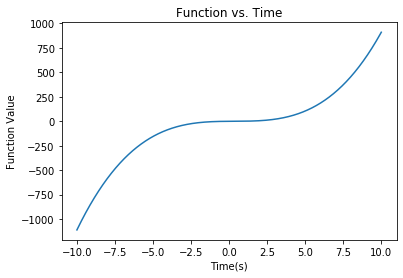

In [15]:
def f(t): #Creates the function that we are going to plot
    return t**3-t**2+t-1

t = np.linspace(-10,10,1000) #Creates an array from -10 to 10 with 1000 points in it
plt.plot(t,f(t)) #Generates a plot of these two vectors.
plt.title('Function vs. Time')
plt.xlabel('Time(s)')
plt.ylabel('Function Value')

### Generate Continuous Random Variables

The following code is going to create a large vector of random numbers using NumPy's random function. Then it's going to plot them. It's taking the random numbers from an exponential distribution and a normal (Gaussian) distribution. They are both continuous random variables.

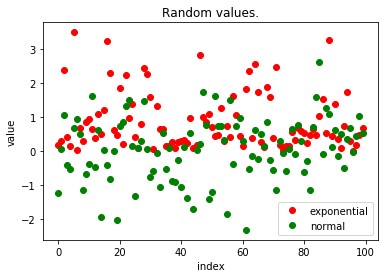

In [16]:
x = np.random.exponential(1,size = 100) #Generates a vector of 100 points from the exponential distribution with mean 1
y = np.random.normal(size = 100) #Generates a vector of 100 points from the standard Normal distribution
plt.plot(x,'ro', label='exponential') #Plots x in red circles with the label exponential
plt.plot(y,'go', label = 'normal')
plt.title('Random values.')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()

These are just the basics to be able to program in Python. I have highlighted some of what I feel are the most important functions or modules to know. For a more complete tutorial, take a look at https://docs.python.org/3.7/tutorial/index.html

## Creating Probability Distribution Objects for Discrete Distributions

The scipy stats package contains a number of functions for using and analyzing distributions.  Two of its classes are rv_discrete and rv_continous, for discrete type and for continuous type distributions, respectively.   A discrete probability distribution is specified by a set of possible values, $c_1,c_2, \ldots $ and associated probabilities for the values, $p_1, p_2, \ldots $ which sum to one.  The probability mass function $p$ is defined by $p(c_i)=p_i$ for all $i,$  and $p(c)=0$ for values $c$ not in the  list of possible values.   A random variable $X$ has such a discrete distribution if $P\{X = u\} = p(u)$ for all $u.$

There are several important families of discrete probability distributions that frequently arise in applications.
A very basic example is the Bernoulli distribution with parameter $p,$  where $0\leq p \leq 1.$
The distribution assigns probability $p$ to value 1, and probability $1-p$ to value 0. If a random variable $X$ has the
Bernoulli distribution with parameter $p$, we call $X$ a Bernoulli random variable with parameter $p,$ and we write
$X \sim Bernoulli(p).$   For example, if $X \sim Bernoulli(\frac{1}{4}),$ then $P\{X = 1\}=\frac{1}{4}$ and
$P\{X = 0\}=1-\frac{1}{4} = \frac{3}{4}$.  There is zero probability that $X$ is any value other than $1$ or $0$.  The class rv_discrete within the scipy stats package is for working with general discrete type random variables, with many instances of the class corresponding to particular well known probability distribuions.  It gives a convenient way to compute the mean, variance, pmf, and other attributes for a given distribution, and for generating random variates, using random number generators, with the given distribution.

For example, one instance of the discrete_rv class is the object for the bernoulli distribution.  By specifying (aka freezing) a value for the parameter $p$ we create a more specialized instance of a discrete_rv class.

Mean: 0.25
Var: 0.1875


Text(0.5, 1.0, 'CDF of Bernoulli(0.25) distribution')

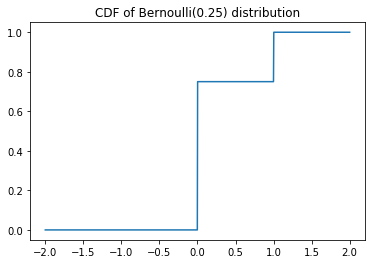

In [17]:
p = 1./4 #Sets the probability, uses decimal to create double (not integer)
bernoulli25 = st.bernoulli(p) #Generates object for Bernoulli(0.25) distribution
x = np.linspace(-2,2,1000) #Generates a vector on [-2,2] with 1000 points in it
print ('Mean:', bernoulli25.mean())  #Prints the mean (aka expected value) for the distribution
print ('Var:', bernoulli25.var())   #Prints the variance of X
plt.plot(x,bernoulli25.cdf(x))  #Creates a graph of the cumulative distribution fucntion (CDF)  of X
plt.title('CDF of Bernoulli(0.25) distribution')

Above, we were able to recreate our Bernoulli distribution through scipy.stats. 
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Using the scipy.stats package do the following:
<html>
    <body>
        <ol>
            <li> Print the mean and standard deviation of a Bernoulli variable where $p=\frac{14}{17}$</li>
            <li> Create a graph of the probability mass function</li>
        </ol>
    </body>
</html>

In [ ]:
########Student Answer##############
#Feel free to answer here.
####################################

Now what if we wanted to create a distribution object for our own distribution? One way to do this is to use
SciPy's rv_discrete class.  In order to have a discrete RV, we need to specify the probability for any value our RV can be, so we create two vectors (we acutally use python tuples, numpy arrays would also work). The first is a vector of probabilities. Let $p =p_1,p_2,...,p_i$ where $\sum{p_i}=1$. The second is a tuple of values. Let $c=c_1,c_2,...,c_i$ such that $P\{X=c_i\}=p_i$. These two vectors specified the pmf.  The cusom probability distribution object can be created, and then used as before:

Mean: 5.2
Var: 12.279999999999998


Text(0.5, 1.0, 'CDF of Xcstm')

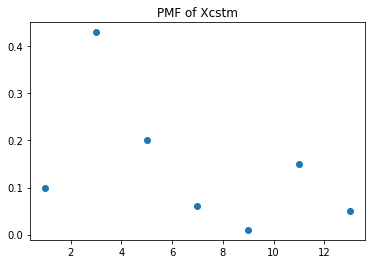

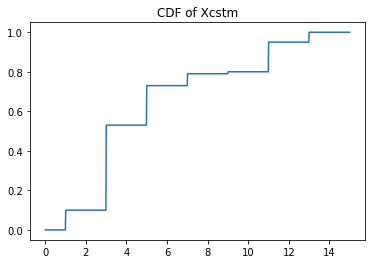

In [18]:
p = (.1,.43,.2,.06,.01,.15,.05) #Vector of probabilities (as a tuple)
c = (1,3,5,7,9,11,13) #Vector of values (as a tuple)
Xcstm = st.rv_discrete(name='Xcstm',values=(c,p)) #Creates an instance (aka object) of rv_discrete from our vectors
print ('Mean:', Xcstm.mean())
print ('Var:', Xcstm.var())
plt.plot(c,Xcstm.pmf(c),'o')
plt.title('PMF of Xcstm') #Plot the histogram (frequency) view of random variable Xcstm
plt.figure() #Let's be able to plot another graph below the first
n = np.linspace(0,15,1000)
plt.plot(n,Xcstm.cdf(n))
plt.title('CDF of Xcstm')

<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** Simulate a single roll of a standard six sided dice. The probability of any side being rolled is $\frac{1}{6}$ and the value is how many dots on the dice are facing up.
<html>
    <body>
        <ol>
            <li> Create your own discrete variable to represent a dice roll</li>
            <li> Print out the mean</li>
            <li> Graph the CDF</li>
        </ol>
    </body>
</html>

In [ ]:
########Student Answer##############
###################################

If $n$ independent trials are conducted, each with success probability $p,$  then the number of successes has the binomial distribution with parameters $n$ and $p.$   For example, say you were to roll a die eight times, what's the probability you get six showing on exactly five of the rolls? For each trial, $P\{X=6\}=\frac{1}{6}$. So that in eight trials the probability you would get exactly five sixes is: $p_x(k)=\binom{n}{k}p^k(1-p)^{n-k}=\binom{8}{5}{\frac{1}{6}}^5{\frac{5}{6}}^3$
Like the Bernoulli distribution, the stats package has an object for the Binomial distribution.

In [ ]:
#Calculates the probability of getting 5 sixes in 8 trials of a standard die roll
n = 8
p = 1./6
our_binom = st.binom(n,p) #Creates an instance of the binomial distribution object from
                  #the general binomial distribution object by freezing n and p to the values we want
print ('P{X=5}=',our_binom.pmf(5)) #Prints the probability that k=5

Now it's your turn.
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** I'm going to roll a standard dice 12 times and count how many times I roll a $1$ or $2$. 
<html>
    <body>
        <ol>
            <li> Using the st.binom object, create a specialized object my_binom1 for the distribution by freezing n and p to appropriate values </li>
            <li> Print the probability that you roll a $1$ or $2$ a prime number of times. Do your calculations agree?</li>
        </ol>
    </body>
</html>

In [ ]:
########Student Answer##############
####################################

## Plotting a Histogram:

A histogram is a graphical representation of a distribution. It shows the frequency at which values occur. Suppose a probability class has 400 students in it. We can simulate random tests scores (with an average of 70) and plot a histogram. The np.random.rand() function returns a number between 0 and 1. It is from a continuous uniform distribution on this interval. It means that for any $c$ between 0 and 1, the probability the number is less than or equal to $c$ is equal to $c.$

In [ ]:
x = np.zeros(400) #Generates an initial array with 400 students
for i in range(400): #Loops through each of the students
    x[i] = (int)(25*(np.random.rand()-np.random.rand()))+70 #Generates a random test score for that student
plt.hist(x,bins=int(np.max(x))-int(np.min(x))) #Plots a Histogram in range of all valid test scores
plt.title("Histogram of Test Scores")
plt.xlabel('Test Score')
plt.ylabel('Number of Students')

For simulation purposes, it is useful to be able to get a value after a single trial of an RV based on a certain distribution. These are called random variates. From the stats module we've used, you simply need to call the rvs function with a size as an input. NumPy also has an easy way to do this through the random module. When you run the code below, you should see two histograms from the same normal distributions. 

Text(0.5, 1.0, 'Histogram of NumPy Normal Distribution')

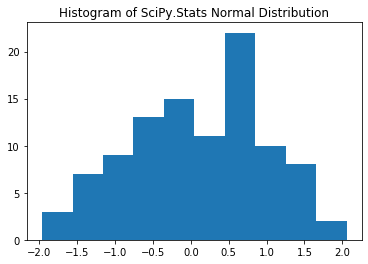

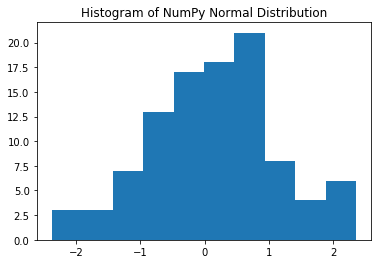

In [3]:
#Simulates a Gaussian RV 100 times in two different ways and creates a histogram

X = st.norm()
#np.random.seed(100)
x = X.rvs(size = 100) #Generates a vector with the results of 100 outputs or trials based on the standard Gaussian distribution
#np.random.seed(100)
y = np.random.normal(size = 100) #Generates a vector with the results of 100 outputs based on the standard Gaussian distribution
plt.hist(x); #Creates a histogram of those results, the default value for the number of bins is bins=10
plt.title('Histogram of SciPy.Stats Normal Distribution')
plt.figure()
plt.hist(y);
plt.title('Histogram of NumPy Normal Distribution')

The scipy and numpy methods for getting these variates should produce the same results, but the two histograms are different. This is due to the random number generator. If we seed the random number generator before running the methods, they should produce consistent results. In the code there are two commented lines with np.random.seed(100). Uncomment these, and run the code again. You should see the histograms are the same now. Essentially, seeding the random number generator, tells it where to start in it's sequence.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 4:</SPAN>** Using the custom discrete variable you made for a roll of the dice in Problem 2. Simulate 100 rolls using the .rvs() method in the stats module. Plot a histogram of the results. Is it what you would expect? Now simulate 10,000 rolls of the die. Is there any difference?

In [ ]:
########Student Answer##############
####################################

## The Law of Large Numbers:

The law of large numbers describes the result of performing the same experiment a large number of times. Let $X_1,X_2, \ldots ,X_n$ be a set of uncorrelated random variables, each with a finite mean of $\mu$. Let $S_n$ represent the sum of these random variables such that $S_n=X_1+X_2+...+X_n$. The law of large numbers states that $P\{|\frac{S_n}{n}-\mu|\ge\delta\}\le\frac{C}{n\delta^2}\to0$ as $n\to\infty$. Put another way this simply states that the sum of the RVs divided by n converges in some sense to the mean ($\frac{S_n}{n}\to\mu$). A proof of this is given in the ECE 313 textbook, using a bounded variance assumption and the Chebychev inequality.

To observe this behavior by simulation, let's look at the Poisson distribution. Recall that a Poisson RV has a single parameter $\lambda$ which represents the mean number of occurances or counts, such as the mean number of hits your Youtube video gets in a day.  Then the probability that your video gets $i$ hits in one day is given by the pmf: $p(i)=\frac{\lambda^ie^-\lambda}{i!}$. So what if you totalled the number of hits you received each day for a week, month, or year and divided by that many days? The law of large numbers asserts that as $n$ gets large this should go to the mean $\lambda$. Below, we create a Poisson distribution where $\lambda=5$ hits per day. We retrieve a random variate each day and model the law of large numbers over time. Try running the cell multiple times and see how much variation there is for different runs.

Text(0.5, 0, 'Number of days')

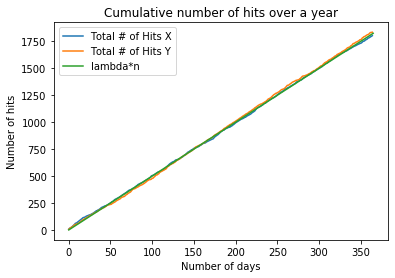

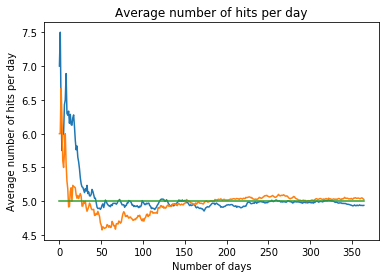

In [4]:
lamb = 5. #Our rate of hits per day
N = 365 #Number of days we are going to simulate over
x = [st.poisson.rvs(lamb)]    #Gets the number of hits on the first day and starts it in a vector
y = [np.random.poisson(lamb)] #Same using numpy instead of scipy.stats
Sx = [x[0]] #Sx will represent cumulative sums of the random variates at different times
Sy = [y[0]] 
Ax = [Sx[0]/1.] #Ax will be an array of averages, Sx/n, at different times
Ay = [Sy[0]/1.] 

for n in range(1,N): #Simulates over a year
    x.append(st.poisson.rvs(lamb)) #Appends the number of hits of the next day to the vector
    y.append(np.random.poisson(lamb))
    Sx.append(Sx[n-1]+x[n]) #Appends the sum at n to the vector
    Sy.append(Sy[n-1]+y[n])
    Ax.append(Sx[n]/(n+1.)) #Appends the sum over n to the vector
    Ay.append(Sy[n]/(n+1.))

n = np.linspace(0,N,1000) #Generates an array of 100 points from 0 to N for graphing purposes

plt.plot(Sx, label = 'Total # of Hits X') #Plots the total number of hits
plt.plot(Sy, label = 'Total # of Hits Y')
plt.plot(n,lamb*n, label = 'lambda*n') #Plots a line based on the rate given
plt.title('Cumulative number of hits over a year')
plt.ylabel('Number of hits')
plt.xlabel('Number of days')
plt.legend()

plt.figure() #Creates a new figure
plt.plot(Ax, label = 'S_x/n') #Plots the average number of hits
plt.plot(Ay, label = 'S_y/n')
plt.plot(lamb*np.ones(N), label = 'rate lambda') #Plots the expected average
plt.title('Average number of hits per day')
plt.ylabel('Average number of hits per day')
plt.xlabel('Number of days')

You can play with the above code. Change $\mu$ or change the number of days we simulate over. You should see that $\frac{S_n}{n}\to\mu$ as the number of days, $n$, increases. 
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 5:</SPAN>** Using your discrete dice rolling RV, once again simulate 1000 rolls of the dice. Show graphically that the law of large numbers is maintained for the average of the numbers of the first $n$ rolls as $n\rightarrow\infty.$ What would be a rough approximation of the sum? Of the average?

In [ ]:
########Student Answer##############
###################################

## Random Walks

Before we go over random walks, i's first a good idea to talk about a random process. We actually were just using one above when we were simulating the hits per day of a YouTube video. Simply put, a random process is a collection of indexed random variables on the same probability space. We say $X = (X_t: \in T)$ is a random process where each $X_t$ is a random variable possibly dependent on time. A random walk is the formalization of a path based on discrete random steps. At any given step, the next step is determined by a random variable. Let's visualize this with a scenario. A man goes on a walk with a bag full of marbles. Inside the bag are 4 blue marbles, 3 red marbles, and 2 yellow marble. At every point in time the man pulls a marble out of the bag to determine his next step. If he pulls a blue marble he takes one step back, a red, one step forward, and a yellow two steps forward. Below is a graph of this behavior for 100 time units. Each step he takes is a random variable based on his pick of marbles.

Text(0, 0.5, 'Position')

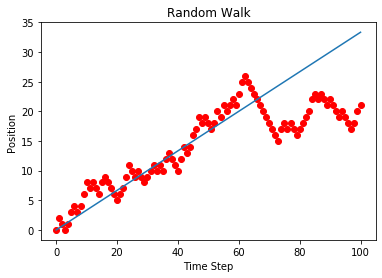

In [5]:
p = [i*1./(4+3+2) for i in [4,3,2]]
c = [-1,1,2]
N = 100
Xmarb = st.rv_discrete(name='Xmarb',values=(c,p))

x = [0]
for n in range(N):
    x.append(x[n]+Xmarb.rvs())
    
plt.plot(x, 'ro', label = 'Walking Step')
n = np.linspace(0,N,10000)
s = np.sum(np.multiply(p,c))
plt.plot(n,np.multiply(s,n), label='Average Step')
plt.title('Random Walk')
plt.xlabel('Time Step')
plt.ylabel('Position')

In the above graph we plot the actual path the man takes versus what we would expect his path to be. At each step he independently pulls out a marble. We can calculate his expected step size by simply finding the expected value of the random variable. If you increase the number of time steps $N$, you'll notice that his random walk more closely resembles our expectations. This follows directly from 
the law of large numbers.

In this next example, we do the same thing, but now each of his steps vary with time. They are no longer identical, and so for each step we have to create a new distribution. For every unit in time, the man can either take two steps forward with probability $\cos (2\pi n/N)^2$ or take one step backward with probability  $\sin(2\pi n/N)^2$. So his probability of moving forward changes in time. Try running the code multiple times. Try larger N such as N=400 and again run the code multiple times.

In [ ]:
x = [0.]
N = 40
for n in range(N):
    p = [np.cos(2.*np.pi*float(n)/N)**2,np.sin(2.*np.pi*float(n)/N)**2]
    c = [2,-1]
    Xcstm = st.rv_discrete(name='Xcstm',values=(c,p))
    w = Xcstm.rvs()
    x.append(x[n]+w)
plt.plot(x, 'ro', label = 'Walking Step')
plt.title('Random Walk')
plt.xlabel('Time Step')
plt.ylabel('Position')

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 6:</SPAN>** As you can see, if N is increased to a large number such as 400, the whole random walk becomes more deterministic. Calculate expected value of the walk at each step of time n and overlay it onto the plot. For N large the random walk should closely follow your function.

In [ ]:
########Student Answer##############
####################################